<a href="https://colab.research.google.com/github/mrdo19111911/3D-Loading-Divide-space-2.0/blob/main/Copy_of_saving_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as  np
import random as rd
import matplotlib.pyplot as plt 
import time
import numba
from numba import njit

In [ ]:
from matplotlib.pyplot import figure


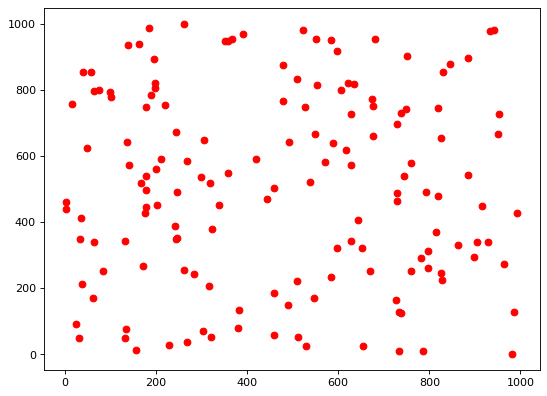

In [ ]:
n =150
location  = np.random.randint( 0, 1000, (n, 2))
figure(figsize=(8, 6), dpi=80)

for i in range(n):
    plt.plot(*location[i], 'ro')
capacity = 10

In [ ]:
def check_feasibility_of_route( route):
    if len(route)> capacity:
        return False 
    return True



In [ ]:
@njit
def create_DM( location):
    DM = np.empty( (n, n), np.int_)
    for i in range(n):
        for j in range(n):
            DM[i,j]  = round( ((location[i,0]-location[j,0])**2+ (location[i,1]-location[j,1])**2)**0.5)
    return DM
DM = create_DM( location)
DM

array([[   0,  414,  706, ...,  724, 1089,  787],
       [ 414,    0,  672, ...,  773,  731,  373],
       [ 706,  672,    0, ...,  155,  758,  861],
       ...,
       [ 724,  773,  155, ...,    0,  912,  998],
       [1089,  731,  758, ...,  912,    0,  519],
       [ 787,  373,  861, ...,  998,  519,    0]])

S5 = width---> diametter cuar nghiem max
S6 =  average. 


In [ ]:
# def  combine_route( solution,i,j):
#     new_route = solution[i]+ solution[j]
#     if i>j: 
#         sm=j
#         bg =i
#     else:
#         sm =i
#         bg = j
#     new_solution =  solution[:sm]+ solution[sm+1:bg]+ solution[ bg+1:] +[new_route]
#     return new_solution






In [ ]:

def draw(solution, location):
    figure(figsize=(8, 6), dpi=180)
    plt.plot(*location[0], "rs")
    for i in range(len(location)):
        plt.plot(*location[i], "bo", markersize =1)
    for trip in solution:
        
        
        trip_all = trip
        if len(trip_all)==0:
            continue
        x= sum([location[trip_all[i]][0]  for i in range(len(trip_all))  ])/ len(trip_all)
        y= sum([location[trip_all[i]][1]  for i in range(len(trip_all)) ])/ len(trip_all)
        plt.text(x,y, len(trip_all))
        k= len(trip_all)

        for i in range(k):
            plt.plot( [location[trip_all[i]][0],  location[trip_all[(i+1)%k]][0] ], [location[trip_all[i]][1],  location[trip_all[(i+1)%k]][1] ], 'b'  ) 

In [ ]:
def cost(route):
    total =0
    trip = [0]+ route+[0]
    for i in range(len(trip)-1):
        total+= DM[trip[i], trip[i+1]]
    return total
def cost_solution(solution):
    total = 0
    for trip in solution:
        total += cost(trip)
    
    return total+ 10000*len(solution)
def savingCW(DM, solution, saving, D_ij_coef=0.7, size_coef= 0.1, S5_coef= 0.7 ):


    saving_by_element  = []
    for i in range(n):
        temp = []
        for j in range(n):
            temp.append( [j, saving[i,j]])
            temp.sort(key = lambda x: -x[1])

        saving_by_element.append(temp)


    def compute_best_saving( data, k, solution):

        saving_pair = [ ]
        pivot  = 0
        already_touch_route = []
        while True:
            if pivot== len(data ):
                break
            if len(saving_pair)== k :
                break
            if data[pivot][0] not in already_touch_route and  data[pivot][1] not in already_touch_route :
                #  saving vi chua dung cham toi.
                # ...
                # step1: add vao already_touch_route
                already_touch_route.append( data[pivot][0])
                already_touch_route.append( data[pivot][1])
                # step2: cho vao saving pair
                saving_pair.append( data[pivot])
            else: 
                pivot +=1
        # print(saving_pair)
        return saving_pair


    def comp_sorted_saving(solution):
        saving_list = []
        for i in range(len(solution)):
            for j in range(len(solution)):
                if i==j:
                    continue
                first_node_route1 =  solution[i][0]
                first_node_route2 =  solution[j][0]
                last_node_route1 =  solution[i][-1]
                last_node_route2 =  solution[j][-1]
                sav_i_j  = saving[last_node_route1, first_node_route2] + round( size_coef*(len(solution[i])+len(solution[j])) * DM[0,first_node_route1 ])
                all = solution[i] + solution[j] 
                A= [DM[x,y] for x in  solution[i]  for y in  solution[j]   ]
                S5 = max(A)

                max_diamenter= S5
                if check_feasibility_of_route(solution[i]+ solution[j] ):
                    saving_list.append(  np.array([ i, j, sav_i_j - round(S5_coef* max_diamenter)] ))
        saving_list.sort(key= lambda y: -y[2])
        return saving_list

    def LS(route):
        this_cost = cost(route)
        for _ in range(1000):
            i= rd.randint(0,len(route))
            j= rd.randint(0,len(route))
            if i>=j:
                continue
            X= route[i:j]
            X=X[::-1]
            new_route = route[:i]+X+route[j:]
            new_cost = cost(new_route)
            if new_cost<this_cost:
                route= new_route
                this_cost =  new_cost

        return route
    def  combine_route_pair( solution,saving_pair):
        new_solution = [  ]
        in_used =  []
        for pair in saving_pair:
            i = pair[0]
            j = pair[1]

            new_route = solution[i]+ solution[j]
            new_route= LS(new_route)

            new_solution.append( new_route)
            in_used.append( i)
            in_used.append( j)

            

        for i in range(len(solution)):
            if i not in in_used:
                new_solution.append( solution[i])
        return new_solution
    data =  comp_sorted_saving(solution)
    saving_pair= compute_best_saving( data,1, solution)
  
    solution =  combine_route_pair( solution,saving_pair)
    
    return solution

In [ ]:
def ML( D_ij_coef=0.7, size_coef= 0.1, S5_coef= 0.7 ):
    solution  = []
    for i in range(n):
        if i > 0:
            solution.append(  [ i])
    saving = np.empty( (n,n), np.int_)
    for i in range(n):
        for j in range(n):
            saving[i, j]  = DM[0, i]+ DM[j,0]- round(DM[i,j]*D_ij_coef) # uwu tieen nghiem xa
            if i==j:
                saving[i, j] =0

    for i in range(300):
        old_solution = solution

        solution = savingCW(DM, solution, saving, D_ij_coef=0.7, size_coef= 0.1, S5_coef= 0.7 )
    

        # if i%5==0:
            
        if solution==old_solution:
            # draw(solution, location)
            # plt.show()
            
            break
    draw(solution, location)
    # if len(saving_pair)==0:
    #     break
    plt.show()
    return cost_solution(solution)

In [ ]:
final_data = []
coef= []
best_cost = 1000000000000
for i in range(10):
    for j in range(10):
        for k in range(10):
            result = ML( D_ij_coef=(i+1)/10, size_coef=(j+1)/10, S5_coef= (k+1)/10 )
            if best_cost>result:
                best_cost = result
                ceof =[i,j,k]
                print(ceof, best_cost)
            final_data.append( [i,j,k, result])


No S5
